##  Bike Sharing Assignment

## 1. <u>Importing and Understanding Data</u>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read Data
df=pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### check the shape and columns of dataframe

In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 2. <u>Data Cleaning and Manipulation</u>
#### Check for the null values in data

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b>Observation: </b>
- There is no null values in any column

### Drop duplicates
- Drop duplicates
- Check shape of the dataframe

In [9]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(730, 16)

<b>Observation: </b>
- As there is no change in shape of the data even after dropping duplicates, that means there are no duplicates in the original dataframe as well.

### <u>Drop columns that are not useful for data analysis<u>
- instant: It is the record index
- dteday: This is date already available in column yr, month and weekday
- casual and registered column - As cnt column already exists as a sum of both the values

In [11]:
df.drop(['instant'],axis=1,inplace=True)

In [12]:
df.drop(['dteday'],axis=1,inplace=True)

In [13]:
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

###### Now, check for the data and its data types

In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [16]:
df.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [17]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [18]:
# Encoding the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [19]:
# Encoding/mapping the month column
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [20]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [21]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [22]:
# check the head of the dataset

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## 3. <u>DATA VISUALISATION</u>

##### Draw pairplots to check for linear relationship

<Figure size 1080x2160 with 0 Axes>

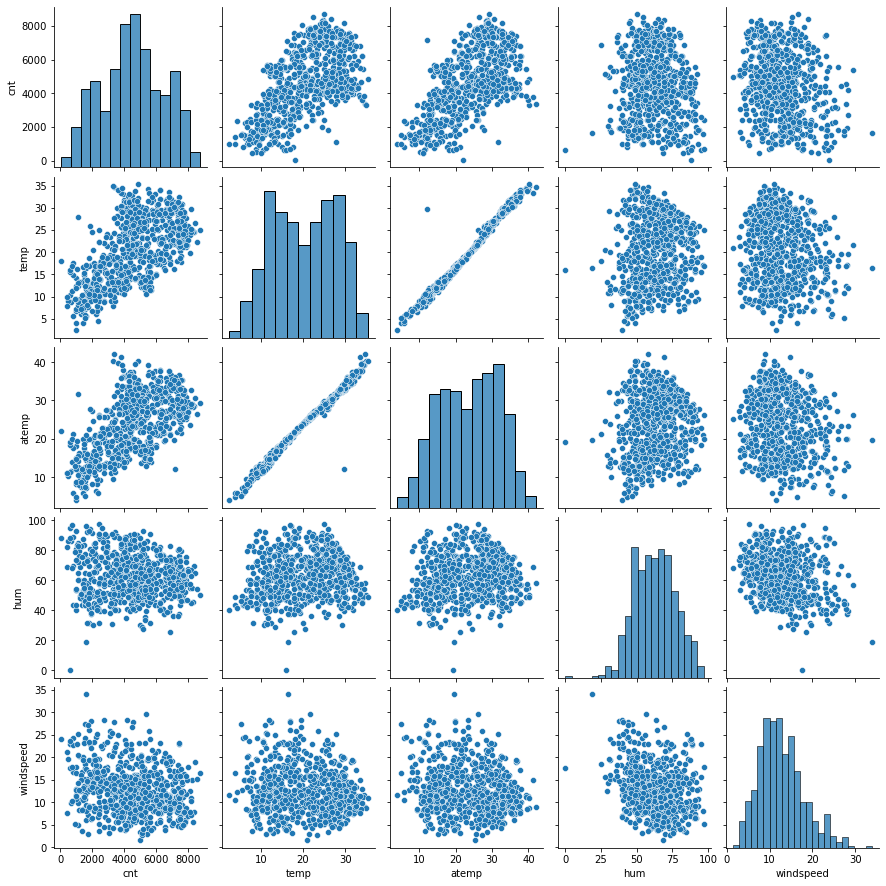

In [24]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<b>Observation: </b>
- So from the above plots it is clear that there is high correlation between temp and atemp.
- temp and atemp columns have linear relationship 

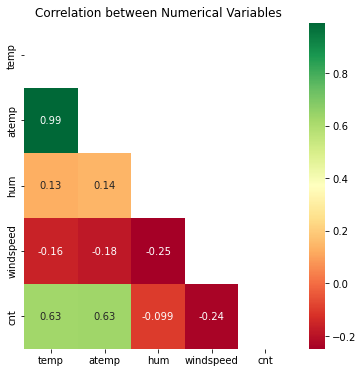

In [25]:
# Check the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

<b>Observation: </b>
- As there is linear relationship between temp and atemp. 
- Both of the parameters cannot be used in the model due to multicolinearity. 
- Keeping parameters decision will be based on VIF and p-value w.r.t other variables

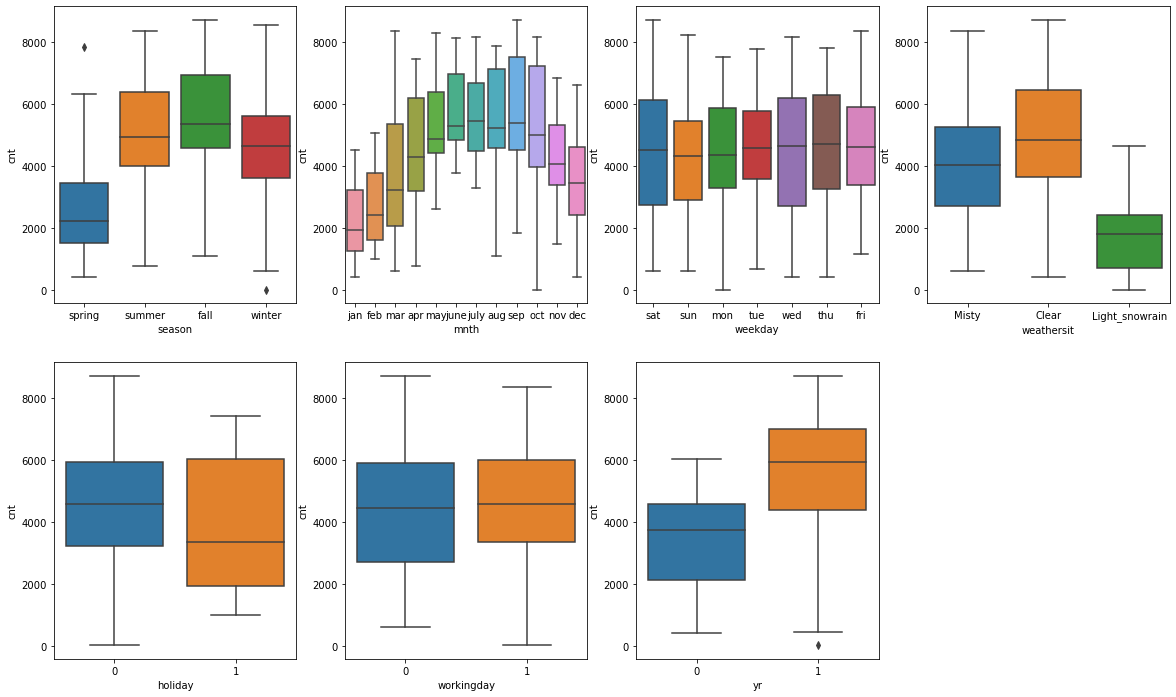

In [26]:
# Analyse the categorical columns. 
# Check how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

<b>Observation: </b>
- Fall season seems to have attracted more booking. Lets check for increase/decrease of cnt from 2018 to 2019. 
- Sep, Oct month have attracted more booking.
- There is no impact of working day on bike booking. 
- As we can see, for weathersit -  when it is clear or misty booking is high else low.
- Having holiday increases the bike booking.
- there is drastic increase in bike booking in year 2019 in comaprison to 2018.

##### User Defined Functions

In [27]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

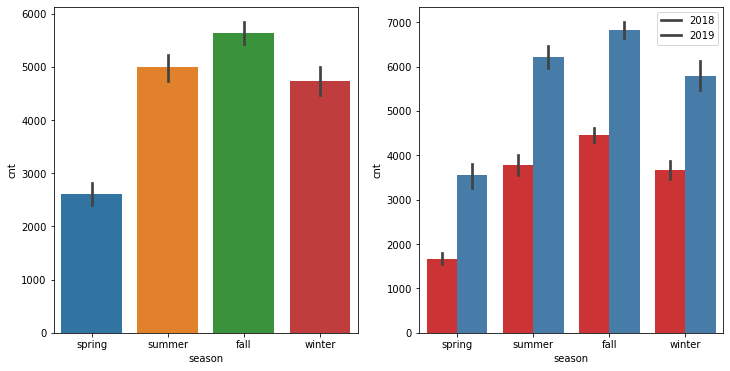

In [28]:
plot_cat_columns('season')

<b>Observation: </b>
- Bike booking is more in Fall season. And in 2019 booking is more than 2018 for each season.

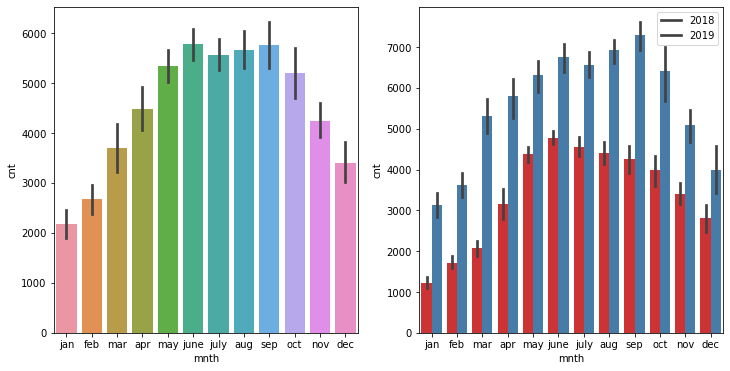

In [29]:
# plotting visualization for month column

plot_cat_columns('mnth')

<b>Observation: </b> 
- As we can see booking increased starting of the year till mid of the year and then it started decreasing as we approached the end of year.

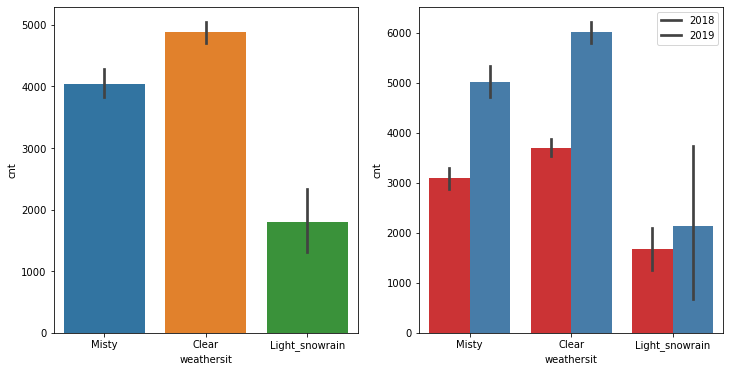

In [30]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

<b>Observation: </b> 
- Clear weather attracted more booking which seems obvious.

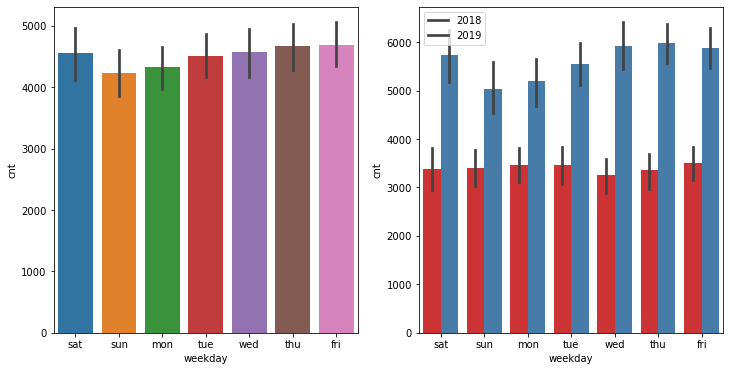

In [31]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

<b>Observation: </b> 
- Thu, Fri, Sat and Sun have more number of bookings as compared to the start of the week.

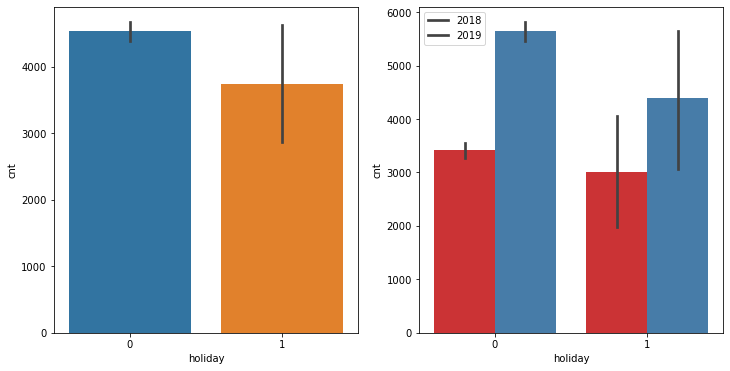

In [32]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

<b>Observation: </b> 
- It seems on holiday there is more bike booking.

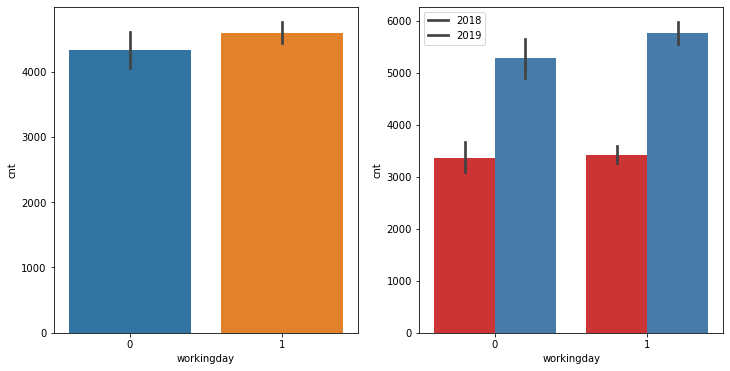

In [33]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

<b>Observation: </b> 
- There is no impact of Working days on bike booking

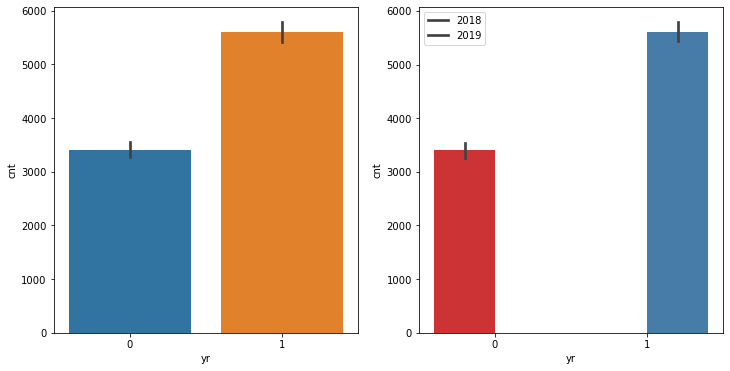

In [34]:
# plotting visualization for year column

plot_cat_columns('yr')

<b>Observation: </b> 
- As we can see for all plots, there is more booking in 2019 in comparison to 2018.
- As 2019 attracted more customer in comparison to previous year, which means that there is good progress in terms of business.

## 4. <u>Data Preparation</u>

In [35]:
#Creating dummy variables for categorical variables
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"],drop_first=True)


In [36]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [37]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Splitting data into train and test data
np.random.seed(0)
#Train Test split with 70:30 ratio
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [39]:
# Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## 5. <u>Rescaling the Features</u>
We will use MinMax scaling.

In [40]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


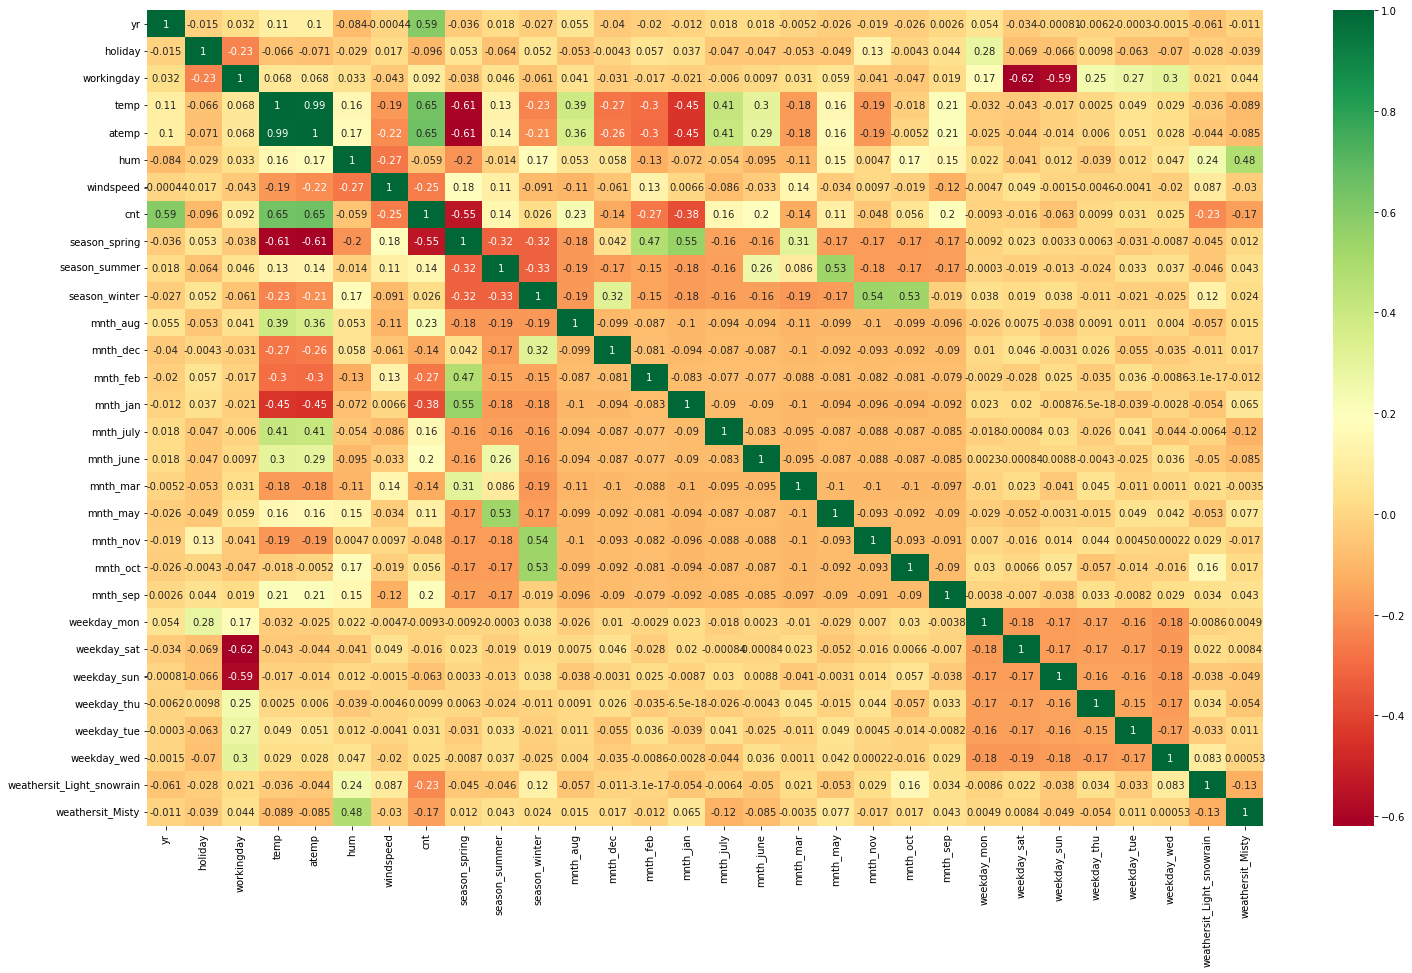

In [43]:
plt.figure(figsize = (25, 15))  #Checking if the variables are highly correlated
sns.heatmap(df_train.corr(), cmap="RdYlGn",annot = True)
plt.show()

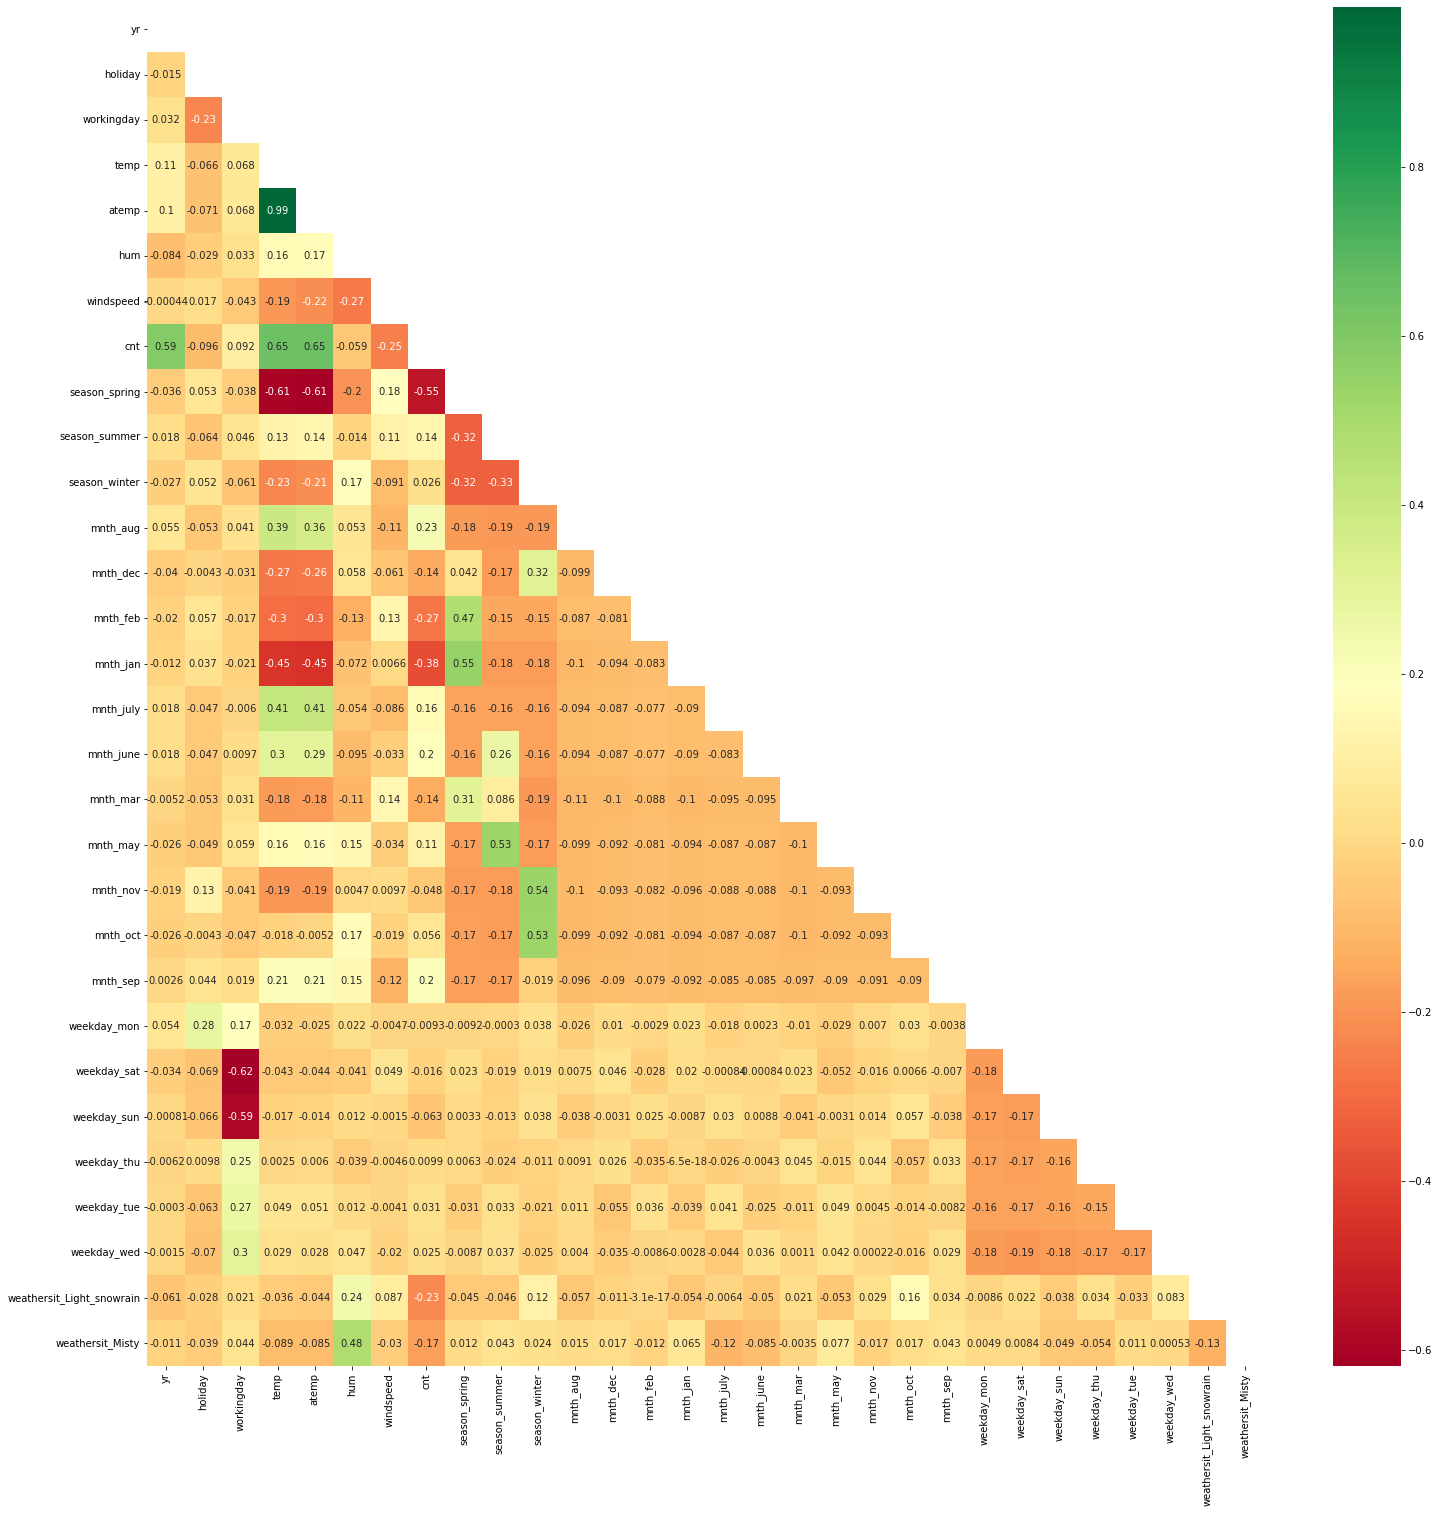

In [44]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

<b>Observation: </b> 
- cnt seems to have correlation with year variable, atemp and temp. 
- Similarly, Misty and humidity show correlation. 
- Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

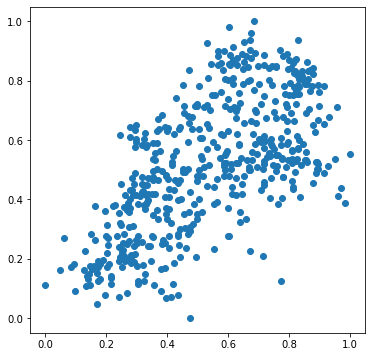

In [45]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

<b>Observation: </b> 
- Visualization confirms the positive correlation between temp and cnt.

## 6. <u>Build Model using RFE (Recursive feature elimination )</u>

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [49]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 13),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 3),
 ('mnth_july', True, 1),
 ('mnth_june', False, 15),
 ('mnth_mar', False, 7),
 ('mnth_may', False, 4),
 ('mnth_nov', False, 10),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [50]:
#Function to build a model using statsmodel api
def Create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [51]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [52]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [53]:
#Function to build a model using statsmodel api
def CreateModel(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [54]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [55]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [56]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
X_train_rfe.shape

(510, 15)

### Model 1

In [58]:
Create_model(col)
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.11e-191
Time:                        14:41:04   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Misty,1.57


<b>Observation:</b>
- VIF for workingday columns is very high so we can drop it

### Model 2

In [59]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

In [60]:
CreateModel(X_train_new)
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.11e-191
Time:                        14:41:06   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
5,season_spring,4.03
7,season_winter,3.36
6,season_summer,2.79
13,weathersit_Misty,2.30
0,yr,2.08
8,mnth_july,1.59
9,mnth_sep,1.39


<b>Observation:</b>
- VIF for hum columns is very high so we can drop it

### Model 3

In [61]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1) 


In [62]:
CreateModel(X_train_new)
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.28e-188
Time:                        14:41:07   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,temp,5.18
3,windspeed,4.63
5,season_summer,2.24
4,season_spring,2.13
0,yr,2.07
6,season_winter,1.84
7,mnth_july,1.59
12,weathersit_Misty,1.56
8,mnth_sep,1.34
9,weekday_sat,1.23


<b>Observation: </b> 
- VIF values seems to be ok now. 
- But if we see weekday_sat P value then it seems to be very high P value. So, it make sense to drop it.

### Model 4

In [63]:
# We can drop weekday_sat variable as it has high p-value
X_train_new = X_train_new.drop(['weekday_sat'], axis = 1)


In [64]:

# Run the function to calculate VIF for the new model
CreateModel(X_train_new)
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.45e-189
Time:                        14:41:09   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,season_summer,2.24
4,season_spring,2.11
0,yr,2.07
6,season_winter,1.81
7,mnth_july,1.59
11,weathersit_Misty,1.56
8,mnth_sep,1.34
9,weekday_sun,1.18


<b>Observation: </b> 
- VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.
- Lets try by dropping mnth_july which having high P value.

### Model 5

In [65]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_july'], axis = 1)

In [66]:

# Run the function to calculate VIF for the new model
CreateModel(X_train_new)
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          3.23e-189
Time:                        14:41:09   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,yr,2.07
4,season_spring,2.02
5,season_summer,1.91
6,season_winter,1.66
10,weathersit_Misty,1.55
7,mnth_sep,1.23
8,weekday_sun,1.18
9,weathersit_Light_snowrain,1.08


<b>Observation: </b> 
- Lets try by dropping season_spring which having high P value.

### Model 6


In [67]:
# We can drop season_spring variable as it has high p-value
X_train_new = X_train_new.drop(['season_spring'], axis = 1)

In [68]:

# Run the function to calculate VIF for the new model
#lr_6 = CreateModel(X_train_new)
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          6.34e-189
Time:                        14:41:09   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
4,season_summer,1.57
9,weathersit_Misty,1.48
5,season_winter,1.39
6,mnth_sep,1.21
7,weekday_sun,1.17
8,weathersit_Light_snowrain,1.08
1,holiday,1.04


<b>Observation: </b> 
- We can consider the above model i.e Model 6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
- Here VIF seems to be almost accepted.
- p-value for all the features is almost 0.0 and R2 is 0.83
- F-Statistics value is 255.0, which is greater than 1, and the p-value of 6.34e-189 i.e almost equals to zero, states that the overall model is significant
- Hence we finalize this model to use further

In [69]:
lr_6.params

const                        0.134431
yr                           0.232752
holiday                     -0.106683
temp                         0.547114
windspeed                   -0.153073
season_summer                0.087801
season_winter                0.131138
mnth_sep                     0.099353
weekday_sun                 -0.049842
weathersit_Light_snowrain   -0.288321
weathersit_Misty            -0.080555
dtype: float64

## 7. <u>Residual Analysis</u>

In [70]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

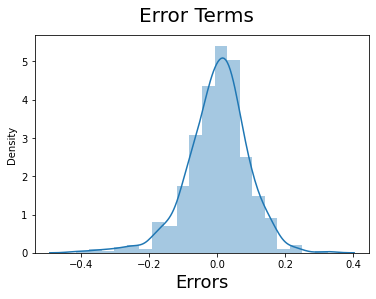

In [71]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Multi Colinearity

In [72]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
4,season_summer,1.57
9,weathersit_Misty,1.48
5,season_winter,1.39
6,mnth_sep,1.21
7,weekday_sun,1.17
8,weathersit_Light_snowrain,1.08
1,holiday,1.04


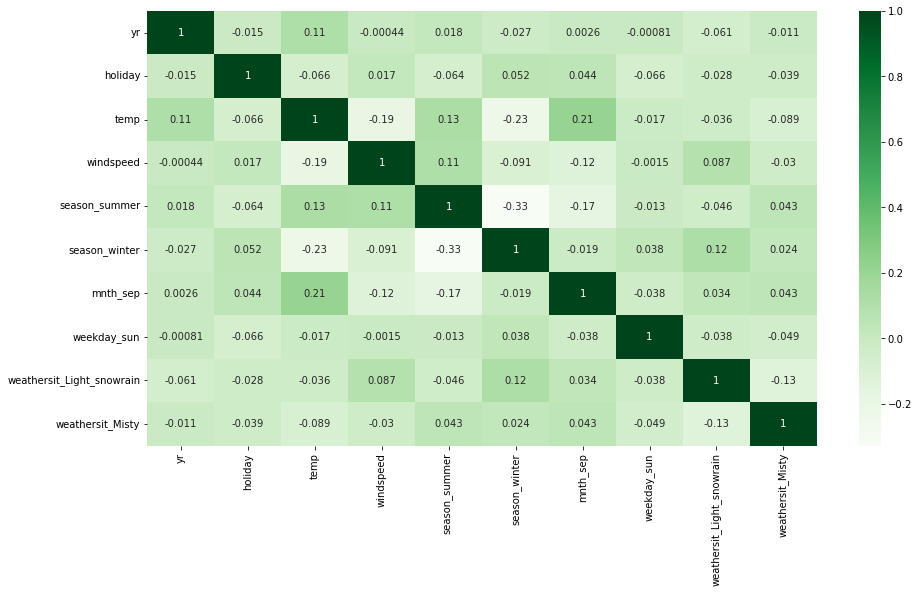

In [73]:
# Heatmaps are great way to show multicollinearity as it provides better visualization. 
#The colors get darker as collinearity increases.
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="Greens")
plt.show()

<b>Observation: </b> 
- VIF values are less than 5 
- there is no multicolinearity as seen from the heatmap.

#### Linearity 

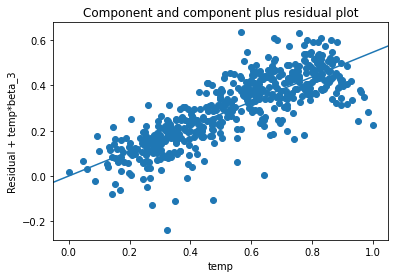

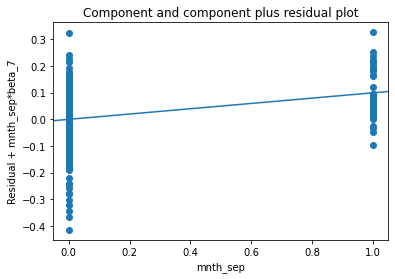

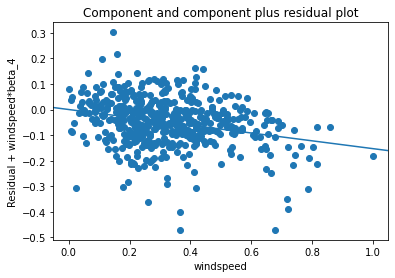

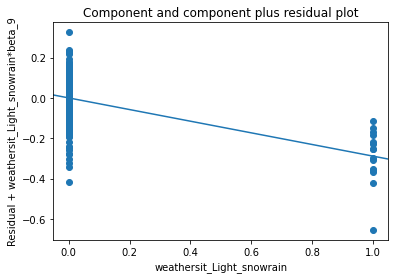

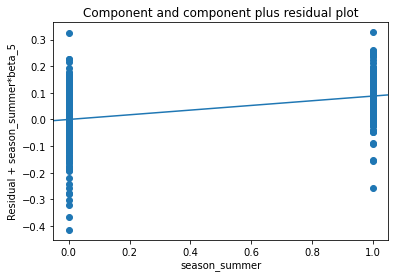

In [74]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'mnth_sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'weathersit_Light_snowrain')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'season_summer')
plt.show()

#### Homoscedasticity

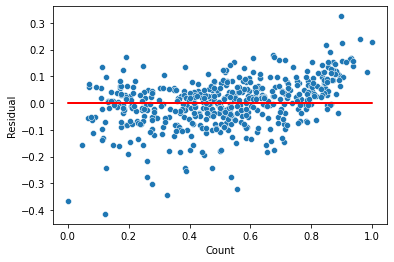

In [75]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No pattern is observed from above plot for residuals.

## 8. <u>Making Predictions</u>

In [76]:
#R-Squared value for train predictions
r2_score(y_train,y_train_pred)

0.836328851648054

In [77]:
#Scale variables in X_test
num_vars =['temp', 'atemp', 'hum', 'windspeed','cnt']
#Fit and transform training set only
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [78]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
X_test = X_test[X_train_new.columns]
# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [81]:
y_pred = lr_6.predict(X_test_lm_6)

In [82]:
#R-Squared value for test predictions
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7879

## 9. <u>Model Evaluation</u>
Plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

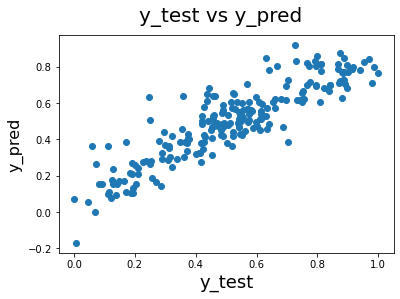

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [84]:
round(lr_6.params,4)

const                        0.1344
yr                           0.2328
holiday                     -0.1067
temp                         0.5471
windspeed                   -0.1531
season_summer                0.0878
season_winter                0.1311
mnth_sep                     0.0994
weekday_sun                 -0.0498
weathersit_Light_snowrain   -0.2883
weathersit_Misty            -0.0806
dtype: float64

We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.1344+0.2328×𝑦𝑒𝑎𝑟−0.1067×ℎ𝑜𝑙𝑖𝑑𝑎𝑦+0.5471×𝑡𝑒𝑚𝑝−0.1531×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0878×season_summer+0.1311×season_winter+0.0994×mnth_sep−0.0498×weekday_sun-0.2883×weathersit_Light_snowrain-0.0806×weathersit_Mistyr

In [85]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7778


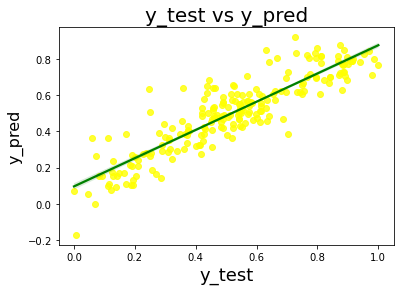

In [86]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "Yellow"}, line_kws={"color": "Green"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Dataset Comparison:

    - Train dataset R^2          : 0.836
    - Test dataset R^2           : 0.7879
    - Train dataset Adjusted R^2 : 0.833    
    - Test dataset Adjusted R^2  : 0.7778

### Conclusion:
- Demand of bikes depend on 
    - year,
    - holiday, 
    - temp, 
    - windspeed, 
    - season_summer,
    - season_winter,
    - mnth_sep,
    - weekday_sun,
    - weathersit_Light_snowrain,
    - weathersit_Misty